=== DATOS COMBINADOS ===
  Ámbito geográfico  Periodo  Tasa_Empleo  Tasa_Desempleo
0            España     2024         51.4            11.4
1            España     2023         51.0            12.2
2            España     2022         50.3            13.0
3            España     2021         49.1            14.9
4            España     2020         47.9            15.5
5            España     2019         49.7            14.1
6            España     2018         49.1            15.3
7            España     2017         48.1            17.2
8            España     2016         47.0            19.6
9            España     2015         45.9            22.1

Dimensiones: (38, 4)
Columnas: ['Ámbito geográfico', 'Periodo', 'Tasa_Empleo', 'Tasa_Desempleo']

=== ESTADÍSTICAS POR ÁMBITO GEOGRÁFICO ===
                  Tasa_Empleo                          Tasa_Desempleo         \
                        count   mean   std   min   max          count   mean   
Ámbito geográfico                  

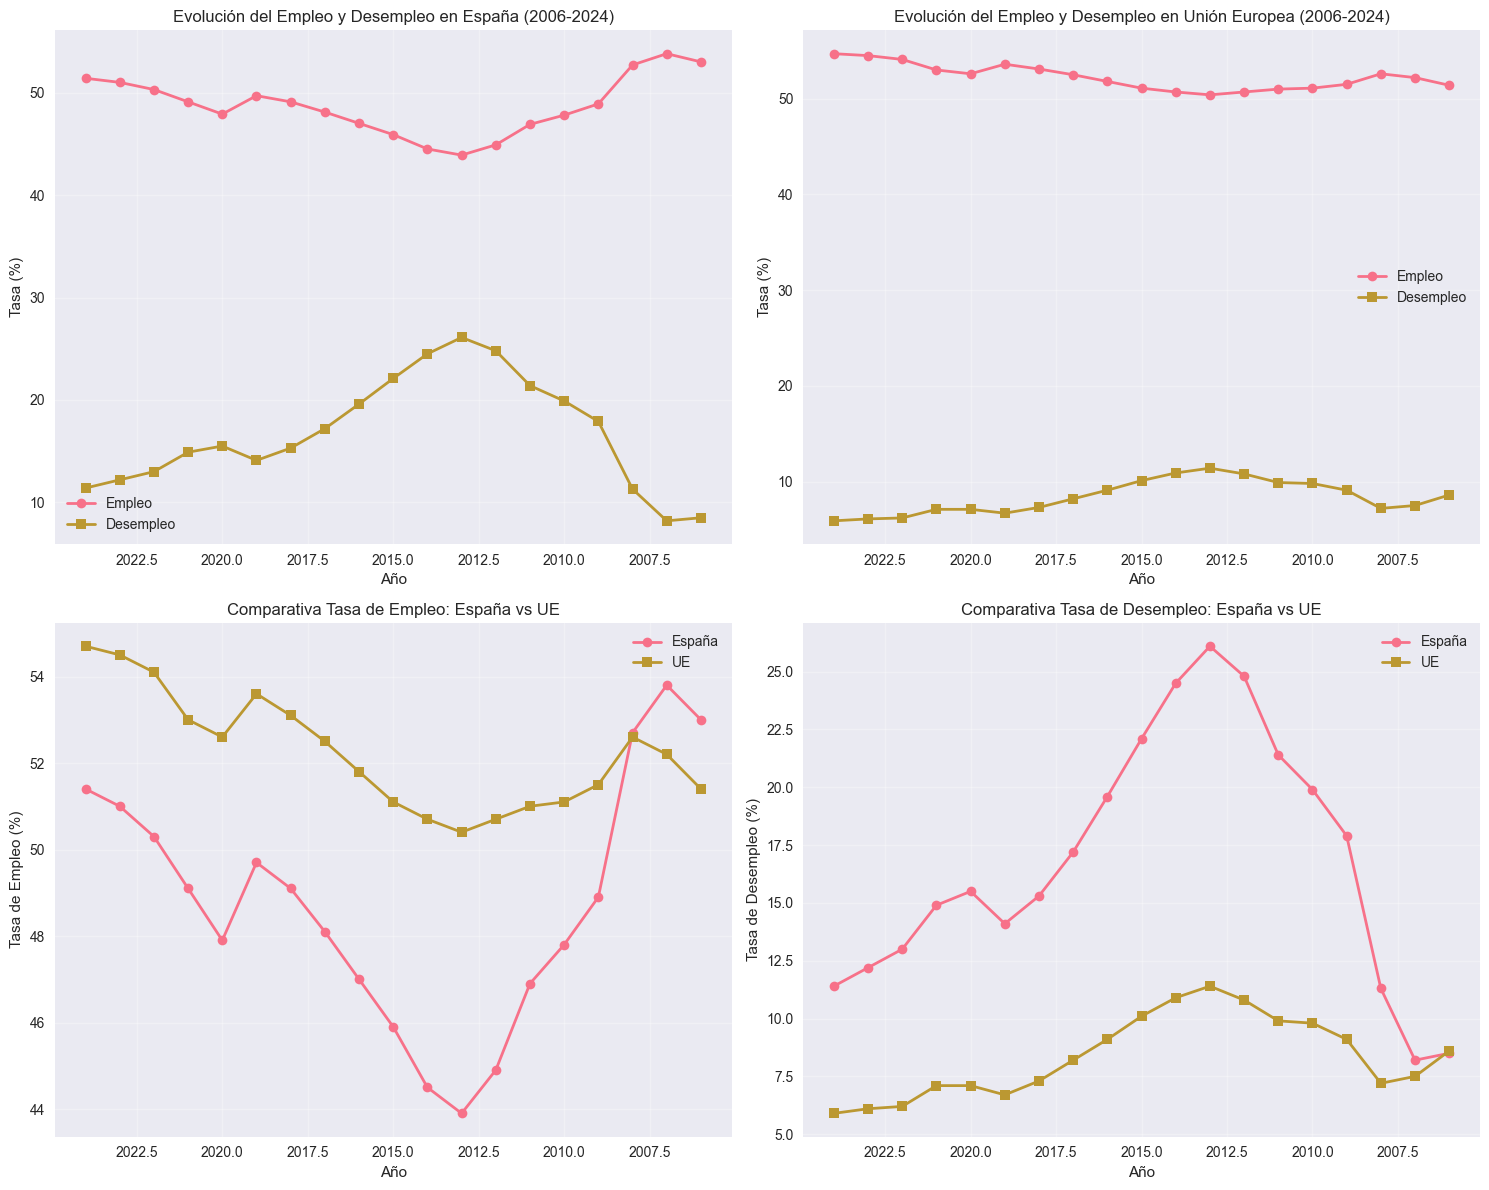


=== DIFERENCIAS ENTRE ESPAÑA Y UE ===
    Periodo  Dif_Empleo  Dif_Desempleo
18     2006         1.6           -0.1
17     2007         1.6            0.7
16     2008         0.1            4.1
15     2009        -2.6            8.8
14     2010        -3.3           10.1
13     2011        -4.1           11.5
12     2012        -5.8           14.0
11     2013        -6.5           14.7
10     2014        -6.2           13.6
9      2015        -5.2           12.0
8      2016        -4.8           10.5
7      2017        -4.4            9.0
6      2018        -4.0            8.0
5      2019        -3.9            7.4
4      2020        -4.7            8.4
3      2021        -3.9            7.8
2      2022        -3.8            6.8
1      2023        -3.5            6.1
0      2024        -3.3            5.5


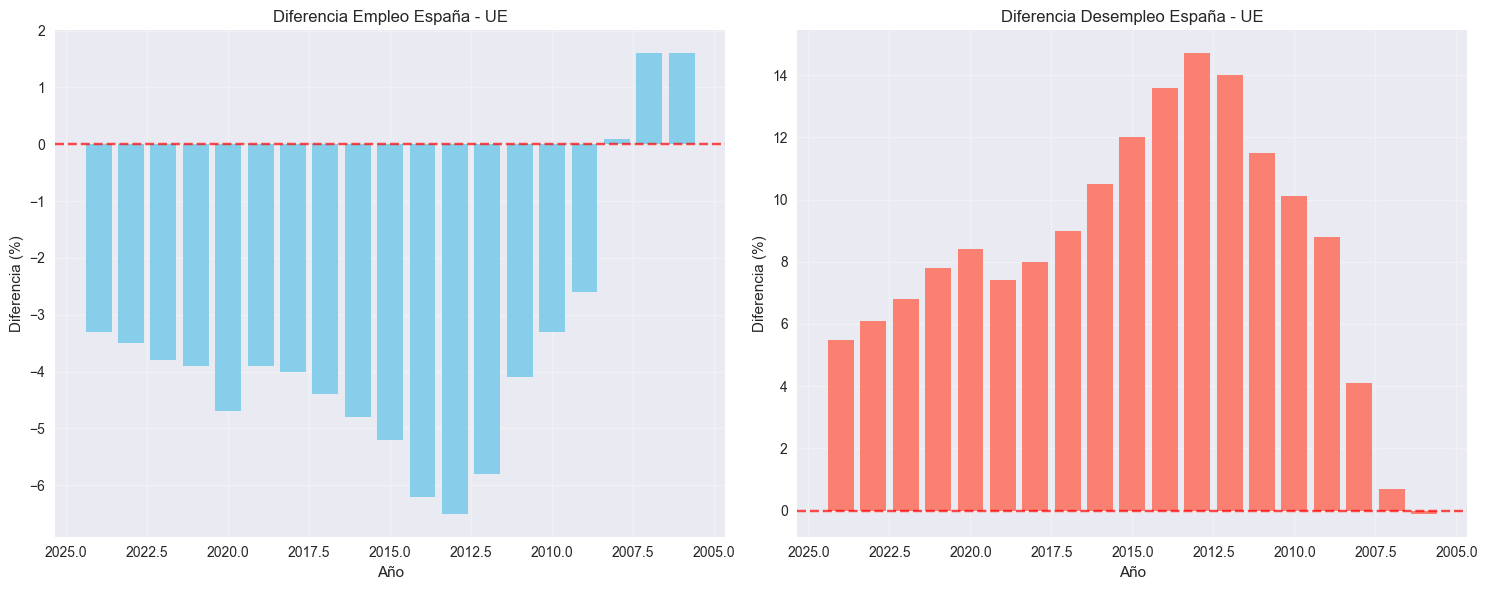


=== MÁXIMOS Y MÍNIMOS HISTÓRICOS ===

España:
  Mayor Empleo: 53.8% (2007)
  Menor Empleo: 43.9% (2013)
  Mayor Desempleo: 26.1% (2013)
  Menor Desempleo: 8.2% (2007)

Unión Europea:
  Mayor Empleo: 54.7% (2024)
  Menor Empleo: 50.4% (2013)
  Mayor Desempleo: 11.4% (2013)
  Menor Desempleo: 5.9% (2024)

✅ Análisis completado!
📁 Archivos guardados:
   - datos_combinados_empleo_desempleo.csv
   - resumen_analisis.txt


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# === PASO 1: CARGAR Y PROCESAR LOS DATOS ===

# Cargar los datos asegurando que 'Total' sea leído como string
empleo = pd.read_csv(
    'C:/Users/Familia/Desktop/DANI/Curso Data Analist/Proyecto final/DATA/Tasa de empleo.csv',
    sep=';', encoding='utf-8',
    dtype={'Total': str}
)

desempleo = pd.read_csv(
    'C:/Users/Familia/Desktop/DANI/Curso Data Analist/Proyecto final/DATA/Tasa de desempleo.csv',
    sep=';', encoding='utf-8',
    dtype={'Total': str}
)

# Limpiar nombres de columnas
empleo.columns = empleo.columns.str.strip()
desempleo.columns = desempleo.columns.str.strip()

# Función para convertir valores con coma decimal a float
def convertir_a_float(serie):
    return pd.to_numeric(serie.astype(str).str.replace(',', '.'), errors='coerce')

# Aplicar conversión y renombrar columnas
empleo['Tasa_Empleo'] = convertir_a_float(empleo['Total'])
desempleo['Tasa_Desempleo'] = convertir_a_float(desempleo['Total'])

# Eliminar columna original 'Total'
empleo = empleo.drop(columns=['Total'])
desempleo = desempleo.drop(columns=['Total'])

# === PASO 2: COMBINAR LOS DATASETS ===

# Combinar por Ámbito geográfico y Periodo
datos_combinados = pd.merge(
    empleo,
    desempleo,
    on=['Ámbito geográfico', 'Periodo'],
    how='inner'
)

print("=== DATOS COMBINADOS ===")
print(datos_combinados.head(10))
print(f"\nDimensiones: {datos_combinados.shape}")
print(f"Columnas: {list(datos_combinados.columns)}")

# === PASO 3: ESTADÍSTICAS DESCRIPTIVAS ===

print("\n=== ESTADÍSTICAS POR ÁMBITO GEOGRÁFICO ===")
estadisticas = datos_combinados.groupby('Ámbito geográfico')[['Tasa_Empleo', 'Tasa_Desempleo']].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

print(estadisticas)

# === PASO 4: CALCULAR CORRELACIÓN ===

print("\n=== CORRELACIÓN ENTRE EMPLEO Y DESEMPLEO ===")
correlacion_global = datos_combinados[['Tasa_Empleo', 'Tasa_Desempleo']].corr().round(3)
print(correlacion_global)

# Correlación por ámbito
for ambito in datos_combinados['Ámbito geográfico'].unique():
    subset = datos_combinados[datos_combinados['Ámbito geográfico'] == ambito]
    corr = subset[['Tasa_Empleo', 'Tasa_Desempleo']].corr().iloc[0, 1]
    print(f"Correlación {ambito}: {corr:.3f}")

# === PASO 5: CREAR VISUALIZACIONES ===

# Gráfico 1: Evolución del empleo y desempleo en España
spain_data = datos_combinados[datos_combinados['Ámbito geográfico'] == 'España'].sort_values('Periodo')
ue_data = datos_combinados[datos_combinados['Ámbito geográfico'] == 'Unión Europea'].sort_values('Periodo')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# España - Evolución
ax1.plot(spain_data['Periodo'], spain_data['Tasa_Empleo'], marker='o', label='Empleo', linewidth=2)
ax1.plot(spain_data['Periodo'], spain_data['Tasa_Desempleo'], marker='s', label='Desempleo', linewidth=2)
ax1.set_title('Evolución del Empleo y Desempleo en España (2006-2024)')
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()

# UE - Evolución
ax2.plot(ue_data['Periodo'], ue_data['Tasa_Empleo'], marker='o', label='Empleo', linewidth=2)
ax2.plot(ue_data['Periodo'], ue_data['Tasa_Desempleo'], marker='s', label='Desempleo', linewidth=2)
ax2.set_title('Evolución del Empleo y Desempleo en Unión Europea (2006-2024)')
ax2.set_xlabel('Año')
ax2.set_ylabel('Tasa (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()

# Comparativa España vs UE - Empleo
ax3.plot(spain_data['Periodo'], spain_data['Tasa_Empleo'], marker='o', label='España', linewidth=2)
ax3.plot(ue_data['Periodo'], ue_data['Tasa_Empleo'], marker='s', label='UE', linewidth=2)
ax3.set_title('Comparativa Tasa de Empleo: España vs UE')
ax3.set_xlabel('Año')
ax3.set_ylabel('Tasa de Empleo (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.invert_xaxis()

# Comparativa España vs UE - Desempleo
ax4.plot(spain_data['Periodo'], spain_data['Tasa_Desempleo'], marker='o', label='España', linewidth=2)
ax4.plot(ue_data['Periodo'], ue_data['Tasa_Desempleo'], marker='s', label='UE', linewidth=2)
ax4.set_title('Comparativa Tasa de Desempleo: España vs UE')
ax4.set_xlabel('Año')
ax4.set_ylabel('Tasa de Desempleo (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.invert_xaxis()

plt.tight_layout()
plt.show()

# === PASO 6: ANÁLISIS DE DIFERENCIAS ===

print("\n=== DIFERENCIAS ENTRE ESPAÑA Y UE ===")
diferencias = pd.DataFrame({
    'Periodo': spain_data['Periodo'],
    'Dif_Empleo': spain_data['Tasa_Empleo'].values - ue_data['Tasa_Empleo'].values,
    'Dif_Desempleo': spain_data['Tasa_Desempleo'].values - ue_data['Tasa_Desempleo'].values
})

print(diferencias.round(2))

# Gráfico de diferencias
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))

ax5.bar(diferencias['Periodo'], diferencias['Dif_Empleo'], color='skyblue')
ax5.set_title('Diferencia Empleo España - UE')
ax5.set_xlabel('Año')
ax5.set_ylabel('Diferencia (%)')
ax5.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax5.invert_xaxis()
ax5.grid(True, alpha=0.3)

ax6.bar(diferencias['Periodo'], diferencias['Dif_Desempleo'], color='salmon')
ax6.set_title('Diferencia Desempleo España - UE')
ax6.set_xlabel('Año')
ax6.set_ylabel('Diferencia (%)')
ax6.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax6.invert_xaxis()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === PASO 7: IDENTIFICAR MÁXIMOS Y MÍNIMOS ===

print("\n=== MÁXIMOS Y MÍNIMOS HISTÓRICOS ===")
for ambito in datos_combinados['Ámbito geográfico'].unique():
    subset = datos_combinados[datos_combinados['Ámbito geográfico'] == ambito]
    
    max_empleo = subset.loc[subset['Tasa_Empleo'].idxmax()]
    min_empleo = subset.loc[subset['Tasa_Empleo'].idxmin()]
    max_desempleo = subset.loc[subset['Tasa_Desempleo'].idxmax()]
    min_desempleo = subset.loc[subset['Tasa_Desempleo'].idxmin()]
    
    print(f"\n{ambito}:")
    print(f"  Mayor Empleo: {max_empleo['Tasa_Empleo']:.1f}% ({max_empleo['Periodo']})")
    print(f"  Menor Empleo: {min_empleo['Tasa_Empleo']:.1f}% ({min_empleo['Periodo']})")
    print(f"  Mayor Desempleo: {max_desempleo['Tasa_Desempleo']:.1f}% ({max_desempleo['Periodo']})")
    print(f"  Menor Desempleo: {min_desempleo['Tasa_Desempleo']:.1f}% ({min_desempleo['Periodo']})")

# === PASO 8: GUARDAR RESULTADOS ===

# Guardar datos combinados
datos_combinados.to_csv(
    'C:/Users/Familia/Desktop/DANI/Curso Data Analist/Proyecto final/datos_combinados_empleo_desempleo.csv',
    index=False, sep=';'
)

# Guardar estadísticas
with open('C:/Users/Familia/Desktop/DANI/Curso Data Analist/Proyecto final/resumen_analisis.txt', 'w', encoding='utf-8') as f:
    f.write("RESUMEN DEL ANÁLISIS DE EMPLEO Y DESEMPLEO\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("DATOS COMBINADOS:\n")
    f.write(str(datos_combinados.head(10)) + "\n\n")
    
    f.write("ESTADÍSTICAS DESCRIPTIVAS:\n")
    f.write(str(estadisticas) + "\n\n")
    
    f.write("CORRELACIONES:\n")
    f.write(str(correlacion_global) + "\n\n")
    
    f.write("MÁXIMOS Y MÍNIMOS:\n")
    for ambito in datos_combinados['Ámbito geográfico'].unique():
        subset = datos_combinados[datos_combinados['Ámbito geográfico'] == ambito]
        max_e = subset.loc[subset['Tasa_Empleo'].idxmax()]
        min_e = subset.loc[subset['Tasa_Empleo'].idxmin()]
        max_d = subset.loc[subset['Tasa_Desempleo'].idxmax()]
        min_d = subset.loc[subset['Tasa_Desempleo'].idxmin()]
        
        f.write(f"{ambito}:\n")
        f.write(f"  Mayor Empleo: {max_e['Tasa_Empleo']:.1f}% ({max_e['Periodo']})\n")
        f.write(f"  Menor Empleo: {min_e['Tasa_Empleo']:.1f}% ({min_e['Periodo']})\n")
        f.write(f"  Mayor Desempleo: {max_d['Tasa_Desempleo']:.1f}% ({max_d['Periodo']})\n")
        f.write(f"  Menor Desempleo: {min_d['Tasa_Desempleo']:.1f}% ({min_d['Periodo']})\n\n")

print("\n✅ Análisis completado!")
print("📁 Archivos guardados:")
print("   - datos_combinados_empleo_desempleo.csv")
print("   - resumen_analisis.txt")